In [199]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from pyEDM import * 

In [115]:
def bounded_random_walk(length, lower_bound,  upper_bound, start, end, std):
    assert (lower_bound <= start and lower_bound <= end)
    assert (start <= upper_bound and end <= upper_bound)

    bounds = upper_bound - lower_bound

    rand = (std * (np.random.random(length) - 0.5)).cumsum()
    rand_trend = np.linspace(rand[0], rand[-1], length)
    rand_deltas = (rand - rand_trend)
    rand_deltas /= np.max([1, (rand_deltas.max()-rand_deltas.min())/bounds])

    trend_line = np.linspace(start, end, length)
    upper_bound_delta = upper_bound - trend_line
    lower_bound_delta = lower_bound - trend_line

    upper_slips_mask = (rand_deltas-upper_bound_delta) >= 0
    upper_deltas =  rand_deltas - upper_bound_delta
    rand_deltas[upper_slips_mask] = (upper_bound_delta - upper_deltas)[upper_slips_mask]

    lower_slips_mask = (lower_bound_delta-rand_deltas) >= 0
    lower_deltas =  lower_bound_delta - rand_deltas
    rand_deltas[lower_slips_mask] = (lower_bound_delta + lower_deltas)[lower_slips_mask]

    return trend_line + rand_deltas



In [184]:
randomData = bounded_random_walk(100, lower_bound=-1, upper_bound =0, start=0, end=0, std=10)
randomData2 = bounded_random_walk(100, lower_bound=1, upper_bound =0, start=0, end=0, std=10)
randomData3 = bounded_random_walk(100, lower_bound=-1, upper_bound =10, start=0, end=0, std=10)
randomData4 = bounded_random_walk(100, lower_bound=-10, upper_bound =0, start=0, end=0, std=10)

In [250]:
# rd1 = bounded_random_walk(100, lower_bound=0, upper_bound =1, start=0, end=0, std=10)
# rd2 = bounded_random_walk(100, lower_bound=-1, upper_bound =0, start=0, end=0, std=10)
# rd3 = bounded_random_walk(100, lower_bound=0, upper_bound =1, start=0, end=0, std=10)
# rd4 = bounded_random_walk(100, lower_bound=-1, upper_bound =0, start=0, end=0, std=10)
# rd5 = bounded_random_walk(100, lower_bound=0, upper_bound =1, start=0, end=0, std=10)
# rd6 = bounded_random_walk(100, lower_bound=-1, upper_bound =0, start=0, end=0, std=10)
# rd7 = bounded_random_walk(100, lower_bound=-0, upper_bound =1, start=0, end=0, std=10)
# rd8 = bounded_random_walk(100, lower_bound=-1, upper_bound =0, start=0, end=0, std=10)
# rd9 = bounded_random_walk(100, lower_bound=0, upper_bound =1, start=0, end=0, std=10)
# rd10 = bounded_random_walk(100, lower_bound=-1, upper_bound =0, start=0, end=0, std=10)

In [310]:
rd1 = bounded_random_walk(36, lower_bound=0, upper_bound =1, start=0, end=0, std=10)
rd2 = bounded_random_walk(36, lower_bound=-1, upper_bound =0, start=0, end=0, std=10)
rd3 = bounded_random_walk(36, lower_bound=0, upper_bound =1, start=0, end=0, std=10)
rd4 = bounded_random_walk(36, lower_bound=-1, upper_bound =0, start=0, end=0, std=10)
rd5 = bounded_random_walk(36, lower_bound=0, upper_bound =1, start=0, end=0, std=10)
rd6 = bounded_random_walk(36, lower_bound=-1, upper_bound =0, start=0, end=0, std=10)
rd7 = bounded_random_walk(36, lower_bound=-0, upper_bound =1, start=0, end=0, std=10)
rd8 = bounded_random_walk(36, lower_bound=-1, upper_bound =0, start=0, end=0, std=10)
rd9 = bounded_random_walk(36, lower_bound=0, upper_bound =1, start=0, end=0, std=10)
rd10 = bounded_random_walk(36, lower_bound=-1, upper_bound =0, start=0, end=0, std=10)

In [312]:
rd = np.concatenate([rd1,rd2,rd3,rd4,rd5, rd6, rd7, rd8])
rd_df = pd.DataFrame(rd, columns = ['Walk'])


In [313]:
rd.shape

(288,)

In [257]:
embed_rd = Embed(dataFrame = rd_df, E = 3, tau = -1, columns = 'Walk', verbose = False)

In [258]:
embed_rd.to_csv('/home/rgreen/DroughtEDM/Data/Random_Walk/rd_df.csv')

In [141]:
# x1 = np.linspace(0, 10, 10)
# x2 = np.linspace(10, 20, 10 )
# x3 = np.linspace(20, 30, 10 )
# x4 = np.linspace(30, 40, 10 )

In [195]:
x1 = np.linspace(0, 100, 100)
x2 = np.linspace(101, 200, 100 )
x3 = np.linspace(201, 300, 100 )
x4 = np.linspace(301, 400, 100 )

In [323]:
sx1 = np.arange(0,20*np.pi,0.1)   # start,stop,step
sy1 = (np.sin(sx1/2))/2
sy1.shape

(629,)

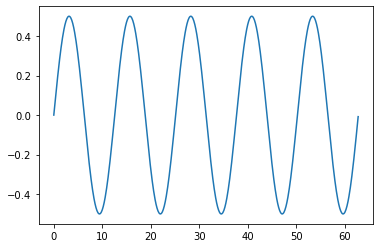

In [324]:
fig = plt.figure()
plt.plot(sx1,sy1)

In [280]:
sin_df = pd.DataFrame(sy1, columns = ['Sine'])
sin_df.insert(0, 'Time', np.arange(1,316,1))

embed_sine = Embed(dataFrame = sin_df, E = 3, tau = -1, columns = 'Sine', verbose = False)


In [281]:
embed_sine.to_csv('/home/rgreen/DroughtEDM/Data/Sine/sin_df.csv')

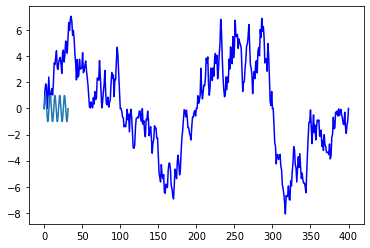

In [197]:
fig = plt.figure()
plt.plot(x1, randomData, 'b')
plt.plot(x2, randomData2, 'b')
plt.plot(x3, randomData3, 'b')
plt.plot(x4, randomData4, 'b')


Plot all together

In [297]:
EA_TS_DIR = '/home/rgreen/DroughtEDM/Data/EA_TS/Final/'
oromia = EA_TS_DIR + 'ETH.8_1_ea_croplands.csv'
orom = pd.read_csv(oromia)

ValueError: x and y must have same first dimension, but have shapes (522,) and (288,)

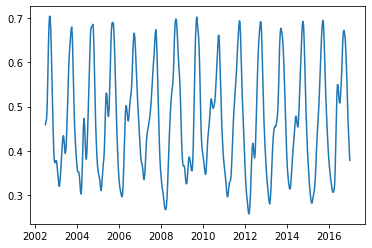

In [325]:
fig = plt.figure()
plt.plot(pd.to_datetime(orom.Time), (orom.NDVI-100)/100)
plt.plot(pd.to_datetime(orom.Time), rd[0:522])
plt.plot(pd.to_datetime(orom.Time), sy1[0:522])

In [302]:
rd[0:522].shape

(522,)